In [5]:
# imports
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

In [6]:
meps = pd.read_csv('2012-Consolidated-stripped.csv')

Interesting codes

TTLP12X -> Person's total income in 2012

TOTEXP12 -> Person's total medical expenditure in 2012

TOTMCD12 -> Person's medical expenditure paid by medicaid in 2012

TOTMCR12 -> Person's medical expenditure paid by medicare in 2012

TOTOTH12 -> Person's medical expenditure paid by other sources in 2012

TOTPRV12 -> Person's medical expenditure paid by private insurance in 2012

TOTPTR12 -> Person's medical expenditure paid by private insurance and tricare in 2012

TOTSLF12 -> Person's medical expenditure paid by self/family in 2012

TOTTCH12 -> Person's healthcare expenditure excluding prescriptions in 2012

MCDEV12 -> Ever Have Medicaid/SCHIP during 12 (ED) 



POVLEV12 is the continuous version of the POVCAT12 variable. The POVLEV12 percentage
was computed by dividing CPS family income by the applicable poverty line (based on family
size and composition). POVCAT12 takes the POVLEV12 percentage for each person and
classifies it into one of five poverty categories: negative or poor (less than 100%), near poor
(100% to less than 125%), low income (125% to less than 200%), middle income (200% to less
than 400%), and high income (greater than or equal to 400%). Persons missing CPSFAMID were
treated as one-person families in constructing their poverty percentage and category. 

FAMINC12 -> total family income for each person’s CPS family
ADGENH42 -> General health today
BMINDX53 -> Adult BMI as based on reported height and weight
EDUCYR -> Number of years of education completed


Imagine needing to justify Purchase of an EHR add on, coordinated care tool, or a specific technology to support chronic disease prevention or management. 

Use the MEPS data to provide backup data for your proposal--such as: utilization and expenditures by the population with that condition, increased expenditures in the presence of comorbidities, and expenditure and utilization variability across payers or population parameters.

In [7]:
meps = meps.query('FAMINC12 >= 0 and BMINDX53 >= 0 and EDUCYR >= 0 and TOTEXP12 >= 0 and ADGENH42 >=0 and MNHLTH42 >= 0')

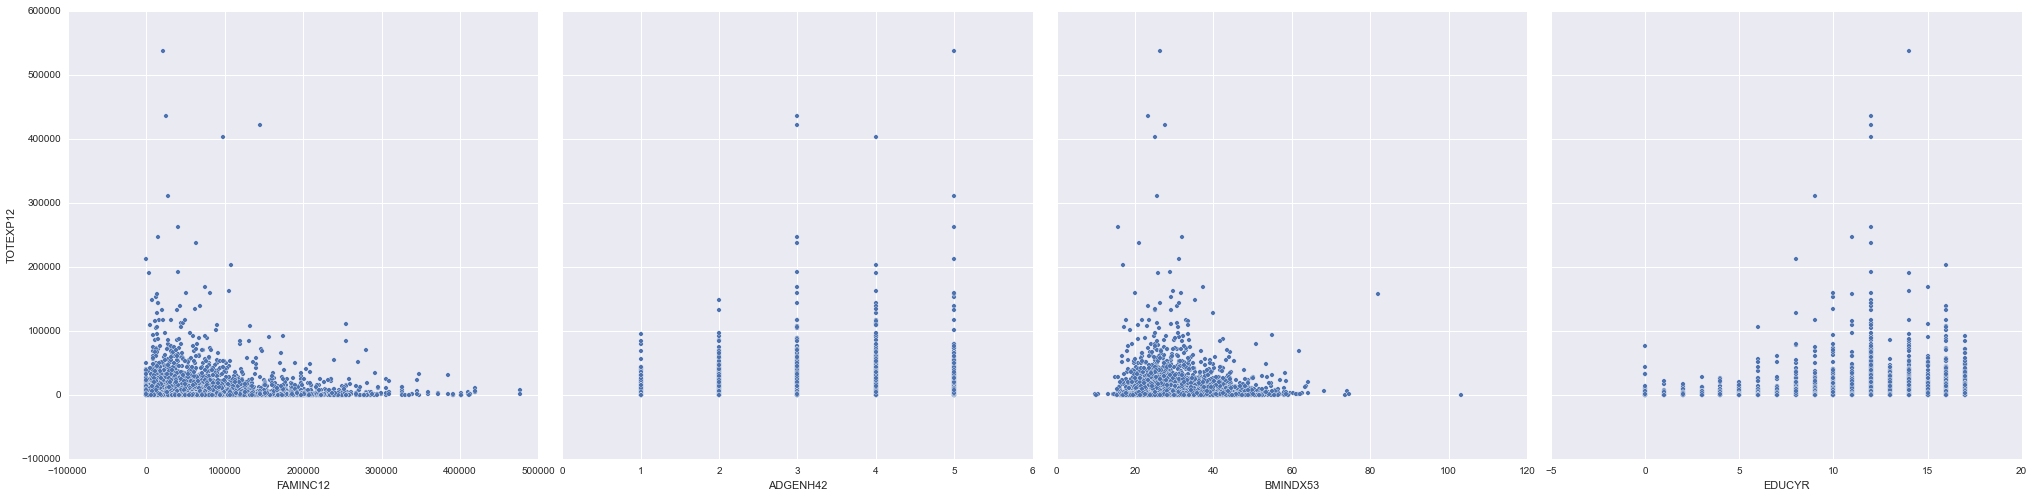

In [8]:
sns.pairplot(meps, x_vars=["FAMINC12", "ADGENH42","BMINDX53", "EDUCYR"], y_vars="TOTEXP12", size=7)

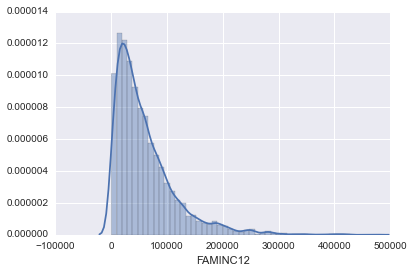

In [9]:
sns.distplot(meps.FAMINC12)

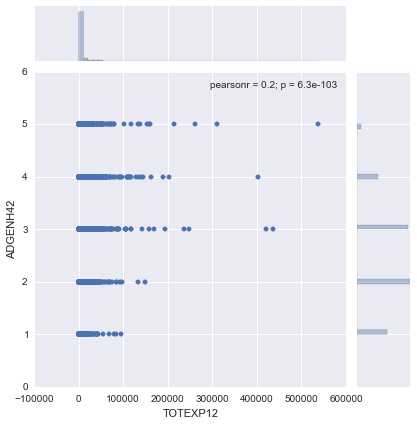

In [10]:
sns.jointplot(x=meps.TOTEXP12, y=meps.ADGENH42)

In [13]:
results = smf.ols('TOTEXP12 ~ FAMINC12 + ADGENH42 + BMINDX53 + EDUCYR', data=meps).fit()
results2 = smf.ols('TOTEXP12 ~ ADGENH42 + BMINDX53 + EDUCYR', data=meps).fit()
results3 = smf.ols('TOTEXP12 ~ C(ADGENH42) + C(MNHLTH42)', data=meps).fit()

In [14]:
print results.summary()

                            OLS Regression Results                            
Dep. Variable:               TOTEXP12   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     131.1
Date:                Fri, 02 Oct 2015   Prob (F-statistic):          9.47e-110
Time:                        19:14:25   Log-Likelihood:            -1.3173e+05
No. Observations:               11968   AIC:                         2.635e+05
Df Residuals:                   11963   BIC:                         2.635e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -7321.0862    910.970     -8.037      0.0

In [15]:
print results2.summary()

                            OLS Regression Results                            
Dep. Variable:               TOTEXP12   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     172.3
Date:                Fri, 02 Oct 2015   Prob (F-statistic):          2.44e-109
Time:                        19:14:25   Log-Likelihood:            -1.3173e+05
No. Observations:               11968   AIC:                         2.635e+05
Df Residuals:                   11964   BIC:                         2.635e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -7213.3039    910.326     -7.924      0.0

In [16]:
print results3.summary()

                            OLS Regression Results                            
Dep. Variable:               TOTEXP12   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     84.10
Date:                Fri, 02 Oct 2015   Prob (F-statistic):          3.95e-136
Time:                        19:14:25   Log-Likelihood:            -1.3166e+05
No. Observations:               11968   AIC:                         2.633e+05
Df Residuals:                   11959   BIC:                         2.634e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept         1857.6245    317.280  

In [17]:
meps = meps.query('DIABDX >= 0 and HIBPDX >= 0 and BPMLDX >= 0 and CHDDX >= 0 and MIDX >= 0 and STRKDX  >= 0 and ASTHDX  >= 0 and ARTHDX  >= 0 and CANCERDX >= 0')
results4 = smf.ols('TOTEXP12 ~ C(DIABDX) + C(HIBPDX) + C(BPMLDX) + C(CHDDX) + C(MIDX) + C(STRKDX) + C(ASTHDX) + C(ARTHDX) + C(CANCERDX)', data=meps).fit()

In [18]:
print results4.summary()

                            OLS Regression Results                            
Dep. Variable:               TOTEXP12   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     34.21
Date:                Fri, 02 Oct 2015   Prob (F-statistic):           1.22e-52
Time:                        19:14:25   Log-Likelihood:                -44285.
No. Observations:                3967   AIC:                         8.859e+04
Df Residuals:                    3958   BIC:                         8.864e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept         2.702e+04   1492.977  

In [35]:
pd.options.mode.chained_assignment = None
meps['DIABASTH'] = meps['DIABDX'].map(lambda x: x if x==1 else 0).astype(int) * meps['ASTHDX'].map(lambda x: x if x==1 else 0).astype(int)
meps['BPMLARTH'] = meps['BPMLDX'].map(lambda x: x if x==1 else 0).astype(int) * meps['ARTHDX'].map(lambda x: x if x==1 else 0).astype(int)
results5 = smf.ols('TOTEXP12 ~ C(DIABASTH) + C(BPMLARTH)', data=meps).fit()
print results5.summary()

                            OLS Regression Results                            
Dep. Variable:               TOTEXP12   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     63.94
Date:                Sat, 03 Oct 2015   Prob (F-statistic):           4.69e-28
Time:                        13:04:47   Log-Likelihood:                -44355.
No. Observations:                3967   AIC:                         8.872e+04
Df Residuals:                    3964   BIC:                         8.873e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept         5111.2296    361.974  

In [37]:
results6 = smf.ols('DIABASTH ~ C(ADGENH42) + C(MNHLTH42)', data=meps).fit()
results6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               DIABASTH   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     8.855
Date:                Sat, 03 Oct 2015   Prob (F-statistic):           4.35e-12
Time:                        13:07:06   Log-Likelihood:                 1390.1
No. Observations:                3967   AIC:                            -2762.
Df Residuals:                    3958   BIC:                            -2706.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            0.0068      0.010      0.665      0.506        -0.013     0.027
C(ADGENH42)[T.2]     0.0022      0.012      0.194      0.846        -0.020     0.025
C(ADGENH42)[T.3]     0.0168      0.011      1.480      0.139        -0.005     0.039
C(ADGENH42)[T.4]     0.0548      0.012      4.449      0.000         0.031     0.079
C(ADGENH42)[T.5]     0.0773      0.017      4.680      0.000         0.045     0.110
C(MNHLTH42)[T.2]    -0.0011      0.008     -0.145      0.885        -0.016     0.014
C(MNHLTH42)[T.3]     0.0051      0.008      0.670      0.503        -0.010     0.020
C(MNHLTH42)[T.4]    -0.0116      0.011     -1.047      0.295        -0.033     0.010
C(MNHLTH42)[T.5]    -0.0272      0.019     -1.431      0.152        -0.064     0.010
==============================================================================
Omnibus:                     4036.753   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           137971.335
Skew:                           5.317   Prob(JB):                         0.00
Kurtosis:                      29.864   Cond. No.                         11.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
results7 = smf.ols('BPMLARTH ~ C(ADGENH42) + C(MNHLTH42)', data=meps).fit()
results7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               BPMLARTH   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     28.57
Date:                Sat, 03 Oct 2015   Prob (F-statistic):           1.23e-43
Time:                        13:08:19   Log-Likelihood:                -2711.0
No. Observations:                3967   AIC:                             5440.
Df Residuals:                    3958   BIC:                             5497.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            0.2495      0.029      8.698      0.000         0.193     0.306
C(ADGENH42)[T.2]     0.0346      0.033      1.063      0.288        -0.029     0.098
C(ADGENH42)[T.3]     0.1209      0.032      3.784      0.000         0.058     0.184
C(ADGENH42)[T.4]     0.2082      0.035      6.005      0.000         0.140     0.276
C(ADGENH42)[T.5]     0.3872      0.046      8.333      0.000         0.296     0.478
C(MNHLTH42)[T.2]     0.0120      0.021      0.570      0.569        -0.029     0.053
C(MNHLTH42)[T.3]     0.0831      0.021      3.895      0.000         0.041     0.125
C(MNHLTH42)[T.4]     0.0697      0.031      2.244      0.025         0.009     0.131
C(MNHLTH42)[T.5]     0.1128      0.053      2.112      0.035         0.008     0.218
==============================================================================
Omnibus:                       68.935   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              533.062
Skew:                           0.331   Prob(JB):                    1.77e-116
Kurtosis:                       1.330   Cond. No.                         11.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""